# Linear regression

Import all the modules you will need in this notebook here:

In [148]:
# exercise 0
# Put your solution here!
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
# plots a line given an intercept and a slope
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [149]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename

fram = pd.read_csv(get_path("fram.txt"), sep='\t')
fram.describe()
    


,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [150]:
# exercise 2

def rescale(series):
    return (series - series.mean()) / (2 * series.std())

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [151]:
# exercise 3
for head in fram.columns:
    try:
        shead = 's' + head
        fram[shead] = rescale(fram[head])
    except (TypeError, ValueError):
        pass
fram.describe


<bound method NDFrame.describe of         ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD  ...      sAGE  \
0     4988  female   57  135  186    NaN  120   150    0    1  ...  0.477764   
1     3001  female   60  123  165    NaN  100   167   25    0  ...  0.791473   
2     5079  female   54  115  140    NaN   90   213    5    0  ...  0.164056   
3     5162  female   52  102  170    NaN  104   280   15    0  ... -0.045083   
4     4672  female   45   99  185    NaN  105   326   20    0  ... -0.777070   
...    ...     ...  ...  ...  ...    ...  ...   ...  ...  ...  ...       ...   
1389  4132    male   51  100  160    NaN   98   216   30    0  ... -0.149653   
1390  5418    male   50   95  174    NaN  106   192    5    0  ... -0.254223   
1391  6260    male   57   88  144    NaN   96   184   20    0  ...  0.477764   
1392  5786    male   62   87  156    NaN   90   255    0    0  ...  1.000612   
1393  6071    male   45   83  156    NaN   90   255   15    0  ... -0.777070   

     

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [152]:
# exercise 4

fit = smf.ols('SBP ~ sFRW + SEX + sCHOL', data=fram).fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           4.13e-40
Time:                        19:53:48   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      0.000     148.088     151.952
SEX[T.male]    -4.0659      1.451     -2.803      0.005      -6.912      -1.220
sFRW           17.7205      1.426     12.431      0.000      14.924      20.517
sCHOL           4.9169      1.431      3.436      0.001       2.110       7.724
==============================================================================
Omnibus:                      327.612   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.676
Skew:                           1.237   Prob(JB):                    6.28e-184
Kurtosis:                       5.899   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [153]:
# exercise 5

fit = smf.ols('SBP ~ sFRW + sAGE + SEX + sCHOL', data=fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.44e-46
Time:                        19:53:48   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***
As we can see form the summary of the fits, adding the variable AGE to the model increases the r-squared value from 0.125 to 0.146 which gives and an increases to the explanatory power of the model, just not a very big one.

We can see from the coefficiencts of the independant variables in the summery that sFRW or 'weight' has the larrges coefficient and thus has the largest impact on the target variable.
***

Try to add to the model all the interactions with other variables. 

In [154]:
# exercise 6

fit = smf.ols('SBP ~ sFRW + sAGE + SEX + sCHOL + sFRW:sAGE + sFRW:SEX + sFRW:sCHOL + sAGE:SEX + sAGE:sCHOL + SEX:sCHOL', data=fram).fit()


Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

c:\Users\henry\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


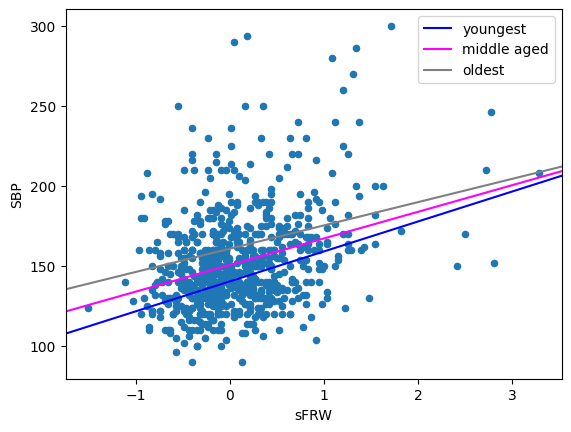

In [155]:
# exercise 7
p=fit.params
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")

abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW - p["sFRW:sAGE"], ax=plt.gca(), color="blue", label="youngest")

abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), color="magenta", label="middle aged")

abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW + p["sFRW:sAGE"], ax=plt.gca(), color="grey", label="oldest")

plt.legend();


How does the dependence of blood pressure on weight change as a person gets older?
***
As we can see from the graph the slope of the 'oldest' regression is smaller then the slope of the middle aged regression. Furthermore the slope of the 'middle aged' regression is smaller then the slope of the youngest regression. This means that as a person gets older, the dependence of blood pressure on weight gets smaller. 
***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

c:\Users\henry\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


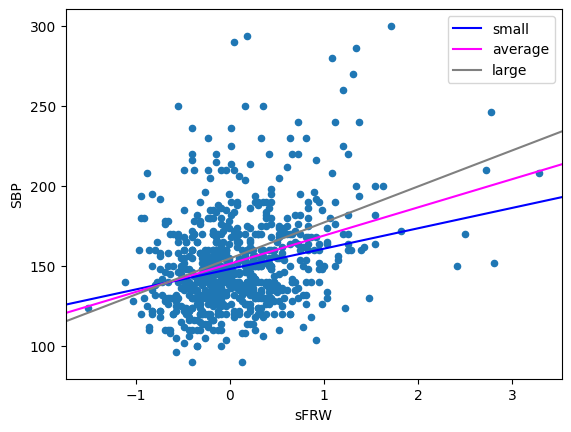

In [156]:
# exercise 8
fit = smf.ols('SBP ~ sFRW + sAGE + SEX + sCHOL + sCIG + sFRW:sCIG + sFRW:sAGE + sFRW:SEX + sFRW:sCHOL + sAGE:SEX + sAGE:sCHOL + sAGE:sCIG + SEX:sCHOL + SEX:sCIG + sCHOL:sCIG', data=fram).fit()


p=fit.params
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")

abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p["sFRW:sCHOL"], ax=plt.gca(), color="blue", label="small")

abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), color="magenta", label="average")

abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p["sFRW:sCHOL"], ax=plt.gca(), color="grey", label="large")

plt.legend();


In [157]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.99e-40
Time:                        19:53:49   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

How does the model and its accuracy look?

***

From the model we can see two main things:
1. Firstly there is a positive coorelation between a persons weight and a persons blood pressure. 
2. Secondly, we can see from the regression lines that as a person has heigher cholestoral, the dependency of blood pressure on weight increases. 

from the summery of the fit, we can see The rsquare value is 0.152. This means that the model is still not very percice. Thus using this regression line would result in not a very accurate prediction. 
***

# Logistic regression

In [158]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [159]:
# exercise 9
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram, 
    family=sm.families.Binomial(statsmodels.genmod.families.links.logit())).fit()

error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | 
                          ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))




Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [160]:
# exercise 10

fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + sAGE:SEX", data=fram, 
              family=sm.families.Binomial(statsmodels.genmod.families.links.logit())).fit()

error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | 
                     ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

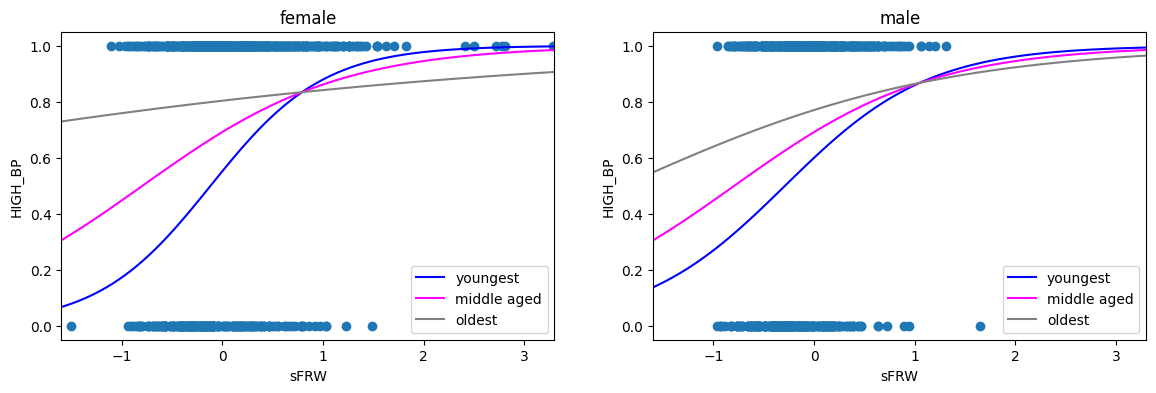

In [161]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

fig, ax = plt.subplots(1, 2, subplot_kw={"xlim": (-1.6, 3.3), "xlabel": "sFRW", "ylabel": "HIGH_BP"}, figsize=(14, 4))

X=np.linspace(-2, 4, 100)
p=fit.params

ax[0].scatter(fram[(fram.SEX=="female")].sFRW, fram[(fram.SEX=="female")].HIGH_BP)
ax[0].set_title("female")

ax[0].plot(X, logistic(X*(p.sFRW - p['sAGE:sFRW']) + p.Intercept - p.sAGE), color="blue", label="youngest")
ax[0].plot(X, logistic(X*(p.sFRW)+ p.Intercept), color="magenta", label="middle aged")
ax[0].plot(X, logistic(X*(p.sFRW + p['sAGE:sFRW']) + p.Intercept + p.sAGE), color="grey", label="oldest")



ax[1].scatter(fram[(fram.SEX=="male")].sFRW, fram[(fram.SEX=="male")].HIGH_BP)
ax[1].set_title("male")

ax[1].plot(X, logistic(X*(p.sFRW - (p["SEX[T.male]:sFRW"] + p["sAGE:sFRW"])) - p["SEX[T.male]"] + p.Intercept - p.sAGE), color="blue", label="youngest")
ax[1].plot(X, logistic(X*(p.sFRW)+ p.Intercept), color="magenta", label="middle aged")
ax[1].plot(X, logistic(X*(p.sFRW + (p["SEX[T.male]:sFRW"] + p["sAGE:sFRW"])) + p["SEX[T.male]"] + p.Intercept + p.sAGE), color="grey", label="oldest")


ax[0].legend()
ax[1].legend()

How do the models with different ages and genders differ from each other?

***
There are a few main observations about the differences of the above models: 
1. Firstly, old women are more likly to have a high blood pressure irrespective to their weight. On the other hand, high weight old men are about 20% more likly to have a high blood pressure then low weight old men
2. young, light weight women are less likly to have heigh blood pressure then young, leightweight men. 
3. young and middle aged heavy women are more likly to be have high blood pressure then all ages of men. On the other hand, older aged heavy women are less likly to be have high blood pressure then all ages of men

***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [162]:
# exercise 12
def train_test_split(df, train_fraction=0.8):
    train = df.sample(frac=train_fraction)
    test = df.loc[~df.index.isin(train.index)]
    return train, test

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [163]:
# exercise 13
np.random.seed(1)

error_model=[]
error_null=[]

for i in range(100):
    train, test = train_test_split(fram)

    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + SEX:sFRW + sAGE:sFRW + sAGE:SEX", 
        data=train, family=sm.families.Binomial(statsmodels.genmod.families.links.logit())).fit()

    pred = fit.predict(test, transform=True)

    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) |
                         ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1 - test.HIGH_BP).mean())


pd.Series(error_model).mean(), pd.Series(error_null).mean()



(0.3311827956989247, 0.3488530465949821)

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [164]:
# exercise 14
fram['hasCHD'] = (fram['CHD'] > 0).map(int)

fram['hasCHD'].mean()

0.22022955523672882

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [165]:
# exercise 15

np.random.seed(1)

fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", 
            data=fram, family=sm.families.Binomial(statsmodels.genmod.families.links.logit())).fit()

pred = fit.predict(fram, transform=True)

error_rate = np.mean(((pred < 0.5) & (fram.hasCHD==True)) |
                     ((pred > 0.5) & (fram.hasCHD==False)))

error_rate


0.22022955523672882

In [166]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 hasCHD   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -721.19
Date:                Tue, 20 Dec 2022   Deviance:                       1442.4
Time:                        19:53:51   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01950
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2888      0.067    -19.101      0.000      -1.421      -1.157
sCHOL          0.3324      0.130      2.554      0.011       0.077       0.587
sCIG           0.4613      0.126      3.666      0.000       0.215       0.708
sFRW           0.4404      0.130      3.386      0.001       0.185       0.695
sCHOL:sCIG    -0.1022      0.273     -0.374      0.708      -0.637       0.433
sCHOL:sFRW     0.1359      0.239      0.568      0.570      -0.333       0.604
sCIG:sFRW      0.1646      0.258      0.637      0.524      -0.342       0.671
==============================================================================
"""

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

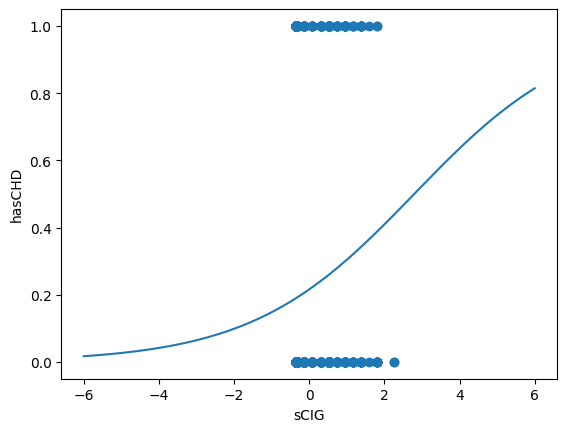

In [169]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

X = np.linspace(-6, 6, 100)

# most important predictor is sCIG

plt.xlabel("sCIG")
plt.ylabel("hasCHD")
plt.scatter(x = fram.sCIG, y = fram.hasCHD)
plt.plot(X, logistic((X*fit.params.sCIG) + fit.params.Intercept))

In [138]:
accuracy = 1 - error_rate
accuracy

0.7797704447632712

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
The prediciton accuracy of the model is about 0.77977, which could be mistakenly considered good. However, this is a very poor model and we should not expect to have poractical use of the model. This is because, as we can see from the graph, the model is actually misclassifying every observation where hasCHD is equal to 1. This is confirmed by the fact that the error_rate is equal to the mean of fram['hasCHD']. 

In other words all observations are being predicted to not have CHD which makes this a bad model.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [172]:
# exercise 17
pchol = (200 - fram.CHOL.mean()) / (2 * fram.CHOL.std())
pcig = (17 - fram.CIG.mean()) / (2 * fram.CIG.std())
pfrw = (100 - fram.FRW.mean()) / (2 * fram.FRW.std())

point = {"sCHOL": pchol, "sCIG": pcig, "sFRW": pfrw}

pred = fit.predict(point, transform=True)
predicted = pred.values[0]
predicted

0.21616166025041